<a href="https://colab.research.google.com/github/suryansh-raghuvanshi-data/ML_From_Scratch/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

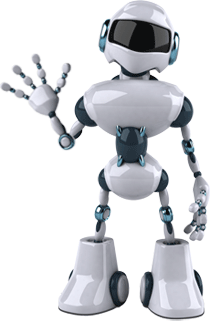
---

#**Welcome to my 1st project from ML From Scratch. In this notebook I'm gonna create a simple KNN Algo.**

####The K-Nearest Neighbor (KNN) algorithm is a machine learning technique that uses distance to classify objects. It's often used for classification, but can also be applied to regression problems.

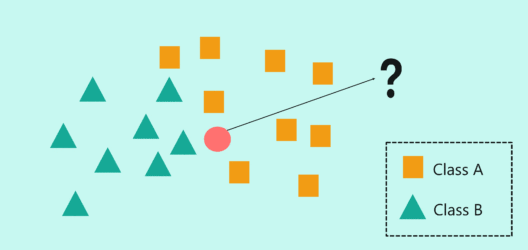


###How does **KNN** works?

---
*KNN* is based on the principle assumption that:

All the characteristic of the majority nearest neighbors have, same should be for the query datapoint. Hence kNN assumes that the neighborhood for a datapoint must be homogeneous in nature (having same properties)


---
Lets look at the steps involved to find the K Nearest Neighbors.

**Step-1**: Select the number K of the neighbors.

**Step-2**: Calculate the Euclidean/Manhattan/Minkowski distance of all the datapoints from selected query point.

**Step-3**: Take the K nearest neighbors as per the calculated distance.

**Step-4**: Among these k neighbors, count the number of the label data points.

**Step-5**: Assign the new data points to that category for which the number of the neighbor is maximum.

**Step-6**: Our model is ready.

##**Cons of KNN**

---

**1)** High computation and storage cost.

**2)** Slow for large dataset.

**3)** Curse of Dimensionality.

**4)** Sensitive to irrelevant features, non-homogenous/imbalanced data & outliers.

**5)** Not good for inference.

The KNN algorithm is sensitive to the scale of data because it relies on computing distances. For features with a higher scale, the calculated distances can be very high and might produce poor results.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
def KNN(X,Y,q,p=2,k=1):
  #q=1->Manhattan Distance, q=2->Euclidean Distance, q>2->Minkowski Distance
  #k:Number of Nearest Neighbour

  #Finding the distance between query point q and all the X
  dist = np.sum(np.abs((X-q)**p),axis=1)**(1/p)


  #Sorting the points in ascending order
  ind = np.argsort(dist)

  #Returning the most occuring value
  return Y.iloc[ind][:k].value_counts().keys()[0]


In [ ]:
#Calculating the accuracy
y_pred = []
for i in X_test:
  y_pred.append(KNN(X_train,y_train,i,k=5))

acc = round(100*(y_pred==y_test).sum()/len(y_test),5)
print(acc)


In [163]:
#Hyperparameter tuning

def accuracy(k, dataset = "test"):
    y_pred = []

    if dataset=='test':
        for Xq in X_test:
            p = KNN(X_train, y_train, Xq, k = k)
            y_pred.append(p)

        y_pred = np.array(y_pred)

        acc = (y_pred == y_test).sum() / len(y_test)
    elif dataset=='train':
        for Xq in X_train:
            p = KNN(X_train, y_train, Xq, k = k)
            y_pred.append(p)

        y_pred = np.array(y_pred)

        acc = (y_pred == y_train).sum() / len(y_train)
    return acc.round(5)*100


In [ ]:
#Understanding the best K value
train_scores = []
test_scores = []
k_values = []


for k in range(1, 15):
    k_values.append(k)
    train_scores.append(accuracy(k, dataset = "train"))
    test_scores.append(accuracy(k, dataset = "test"))


plt.plot(k_values, train_scores)
plt.plot(k_values, test_scores)
plt.title("Different k values")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print("Best k is", k_values[np.argmax(test_scores)])

In [ ]:
#KNN for regression
  #q=1->Manhattan Distance, q=2->Euclidean Distance, q>2->Minkowski Distance
  #k:Number of Nearest Neighbour

  #Finding the distance between query point q and all the X
  dist = np.sum(np.abs((X-q)**p),axis=1)**(1/p)


  #Sorting the points in ascending order
  ind = np.argsort(dist)

  #Returning the Mean/Medium value
  return Y.iloc[ind][:k].mean()

KNN is a flexible and widely used machine learning technique that can be applied to a variety of real-world problems across different fields. Here are some common use cases for KNN in real life:

1. For **classification** tasks, KNN is often used. For instance, it can classify emails as spam or not based on the similarity of their features to known spam and non-spam emails. Additionally, KNN can be used to classify images, such as recognizing handwritten digits or identifying objects in images.

2. KNN can be used in **recommendation systems** to suggest items to users based on their similarity to other users' preferences. Examples include recommending movies to users based on the viewing history and preferences of similar users, or recommending products on e-commerce websites based on what other customers with similar profiles have purchased.

3. **Anomaly detection** can be achieved with KNN. For example, it can identify fraudulent transactions by flagging those that are significantly different from normal transaction patterns, or identify unusual network traffic patterns that may indicate a security breach.

4. Although less common, KNN can also be used for **regression** problems. For example, it can estimate the price of a house based on the prices of k nearest neighboring houses and their features.

5. In **medical diagnosis**, KNN can assist in diagnosing medical conditions by comparing a patient's symptoms or test results to similar cases in a database.

6. In NLP, KNN can be used for **text classification tasks, sentiment analysis, and even finding similar documents or articles**.

7. Identifying **customer segments** based on their behavior, demographics, or preferences can help businesses target marketing efforts more effectively.

8. KNN can be applied to **geospatial data** for tasks such as finding the nearest points of interest, identifying clusters of similar geographic regions, or predicting property values based on nearby amenities.

9. KNN has been used for **handwriting recognition** in digitizing handwritten documents.

10. KNN can be used for **obstacle avoidance and navigation** in robotics and autonomous vehicles by identifying nearby obstacles and determining the safest path.

11. **Analyzing environmental data**, such as air quality measurements, using KNN to identify patterns or pollution sources.

12. In manufacturing, KNN can help in **quality control** by identifying defective products based on similarities to known defects.

KNN's simplicity and effectiveness make it a valuable tool in various domains where pattern recognition, similarity analysis, or data categorization is required. However, it's important to note that KNN's performance can be affected by the choice of distance metric, the number of neighbors (k), and the preprocessing of data. Therefore, careful tuning and feature engineering are often necessary for optimal results in real-world applications.